In [10]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
import scipy

In [11]:
image1 = skimage.io.imread('Data-2/cells/9343 AM.bmp', as_gray=True)
image2 = skimage.io.imread('Data-2/cells/10905 JL.bmp', as_gray=True)
image3 = skimage.io.imread('Data-2/cells/43590 AM.bmp', as_gray=True)

In [12]:
imageGT1 = skimage.io.imread('Data-2/cells/9343 AM Edges.bmp', as_gray=True)
imageGT2 = skimage.io.imread('Data-2/cells/10905 JL Edges.bmp', as_gray=True)
imageGT3 = skimage.io.imread('Data-2/cells/43590 AM Edges.bmp', as_gray=True)

def roc(filtered, groundTruth):
    groundTruth = np.logical_not(groundTruth/255)

    TP = np.sum((filtered == 1) & (groundTruth == 1))
    FP = np.sum((filtered == 1) & (groundTruth == 0))
    TN = np.sum((filtered == 0) & (groundTruth == 0))
    FN = np.sum((filtered == 0) & (groundTruth == 1))

    # Compute TPR and FPR
    tpr = TP / (TP + FN) if (TP + FN) != 0 else 0
    fpr = FP / (FP + TN) if (FP + TN) != 0 else 0

    # formatted_tpr = "{:.4f}".format(tpr)
    # formatted_fpr = "{:.4f}".format(fpr)
    formatted_tpr = round(tpr, 4)
    formatted_fpr = round(fpr, 4)


    print(f'Sobel: TPR {formatted_tpr} FPR {1-formatted_fpr}')

    

In [13]:
def zero_cross(image):
    z_c_image = np.zeros(image.shape)
    thresh = np.absolute(image).mean() * 0.9
    h,w = image.shape
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            patch = image[y-1:y+2, x-1:x+2]
            p = image[y, x]
            maxP = patch.max()
            minP = patch.min()
            if (p > 0):
                zeroCross = True if minP < 0 else False
            else:
                zeroCross = True if maxP > 0 else False
            if ((maxP - minP) > thresh) and zeroCross:
                z_c_image[y, x] = 1
    return z_c_image

In [14]:
def laplacian_of_gaussian(image, sigma=4):
    # Apply Gaussian blur to the image
    blurred_image = scipy.ndimage.gaussian_filter(image, sigma)
    
    laplacian_kernel = np.array([[0,1,0],
                                 [1,-4,1],
                                 [0,1,0]])
    laplacian_image = scipy.ndimage.convolve(blurred_image, laplacian_kernel)
    # laplacian_image = skimage.filters.laplace(blurred_image)

    return laplacian_image

In [15]:
def find_optimal_sigma(image):
    # Define a range of sigma values to experiment with
    sigma_values = np.arange(0.5, 8.0, 0.1)  # Adjust range and step size as needed

    # Initialize lists to store threshold values and LoG-filtered images
    threshold_values = []
    filtered_images = []

    # Compute LoG-filtered images for each sigma value and apply Otsu's method
    for sigma in sigma_values:
        # Apply Gaussian blur
        blurred_image = skimage.filters.gaussian(image, sigma=sigma)

        # Apply LapGau filter
        log_filtered_image = skimage.filters.laplace(blurred_image)
        # laplacian_kernel = np.array([[0,1,0],
        #                          [1,-4,1],
        #                          [0,1,0]])
        # log_filtered_image = scipy.ndimage.convolve(blurred_image, laplacian_kernel)

        # Apply Otsu's method to determine threshold value
        threshold_value = skimage.filters.threshold_otsu(log_filtered_image)

        # Store threshold value and filtered image
        threshold_values.append(threshold_value)
        filtered_images.append(log_filtered_image)

    # Determine the optimal sigma value based on the maximum threshold value
    optimal_sigma_index = np.argmin(threshold_values)
    optimal_sigma = sigma_values[optimal_sigma_index]
    optimal_filtered_image = filtered_images[optimal_sigma_index]

    return optimal_sigma, optimal_filtered_image

In [16]:

op_image_1= laplacian_of_gaussian(image1)
op_image_2 = laplacian_of_gaussian(image2)
op_image_3 = laplacian_of_gaussian(image3)

th = skimage.filters.threshold_otsu(op_image_2)
print(th)

-0.0013903726760594193


In [17]:
z_c_image_1 = zero_cross(op_image_1)
z_c_image_2 = zero_cross(op_image_2)
z_c_image_3 = zero_cross(op_image_3)

roc(z_c_image_1, imageGT1)
roc(z_c_image_2, imageGT2)
roc(z_c_image_3, imageGT3)

Sobel: TPR 0.5217 FPR 0.9627
Sobel: TPR 0.6083 FPR 0.9676
Sobel: TPR 0.4802 FPR 0.9623


(-0.5, 1279.5, 1023.5, -0.5)

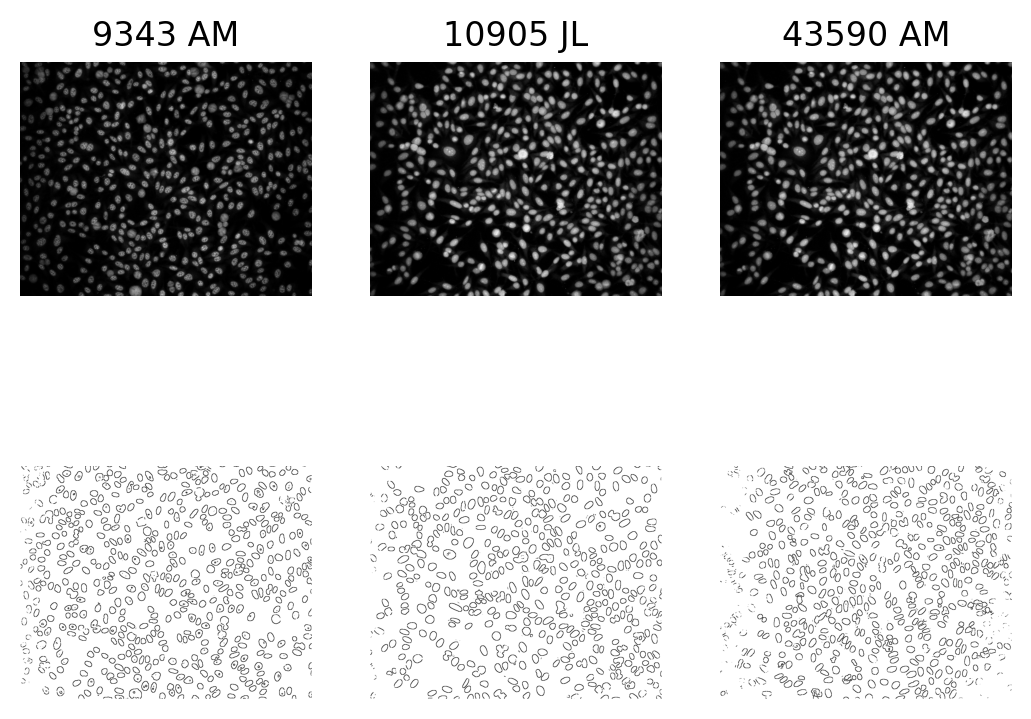

In [18]:
plt.figure(dpi=200)

plt.subplot(2,3,1)
plt.imshow(image1, cmap='gray')
plt.title('9343 AM')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(image2, cmap='gray')
plt.title('10905 JL')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(image2, cmap='gray')
plt.title('43590 AM')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(z_c_image_1, cmap='binary')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(z_c_image_2, cmap='binary')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(z_c_image_3, cmap='binary')
plt.axis('off')
